# Ecology Example
We use here the example of migratory birds in order to demonstrate the model fitting of this package

In [1]:
%matplotlib inline
import ABCPRC as prc
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

/Users/u1472179/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/u1472179/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Model
Here we use a model of migratory birds, were the rate of observation changes across time and the observed counts are negative-binomially
distributed. Associated parameters are
* peak rate of observations $m_0$
* aggregation parameter $k$
* where peak occurs in year $T_0$

In [2]:
def ibm(*ps):
    m0,k = ps[0],ps[1]
    T0 = 0.5
    #measurements in regular increments throughout the year
    ms,ts = np.zeros(100),np.linspace(0,1,100)
    ms = (m0/2)*(np.sin(np.pi/2 + (ts-T0)*2*np.pi)+1)
    ps = k/(k+ms)
    outs = np.array([stats.nbinom(n=k,p=p).rvs() if p>0 else 0 for m,p in zip(ms,ps)])
    return outs


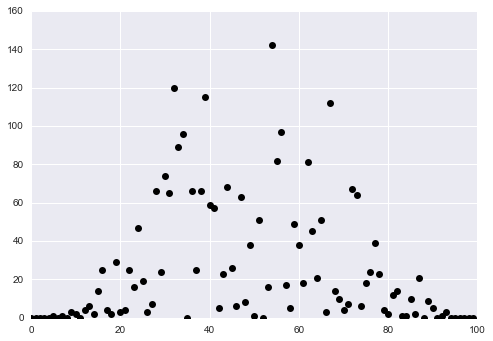

In [3]:
m0,k = 50.0,1.0
xs = ibm(m0,k)
plt.plot(xs,'ko')

### check rates
First let's check that the functional form of the rates are corrected. Let's choose $m_0=10.0$ and $T_0=0.2$

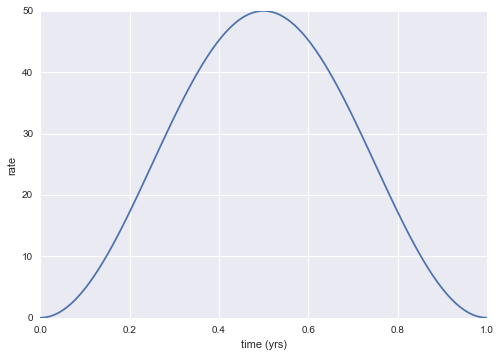

In [4]:
#measurements in regular increments throughout the year
ms,ts = np.zeros(100),np.linspace(0,1,100)
ms = (m0/2)*(np.sin(np.pi/2 + (ts-0.5)*2*np.pi)+1)
plt.plot(ts,ms)
plt.ylabel('rate')
plt.xlabel('time (yrs)')

In [5]:
m = prc.ABC()

In [6]:
priors = [stats.expon(scale=100.0).rvs,stats.expon(scale=0.5).rvs]
m.setup(modelFunc=ibm,xs=xs,priors=priors)

In [7]:
m.fit(sample_size=100)

Progress: [##########] 100% Done...


array([ 13.68805186,  12.17068326,  10.65331467,   9.13594608,
         7.61857748,   6.10120889,   4.5838403 ,   3.0664717 ,
         1.54910311,   0.03173452])

In [8]:
m.run(1000)

Progress: [##########] 100% Done...



Initial Distribution


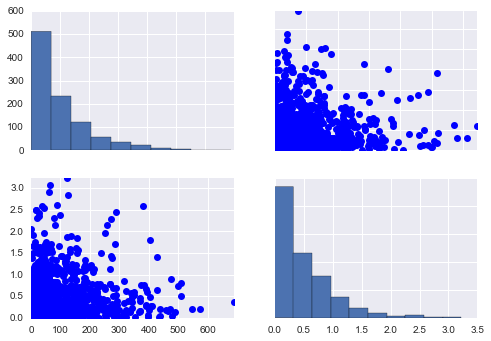

In [9]:
res = m.trace()

plt.figure()
print('Initial Distribution')
m.trace(plot=True,tol=0)

Middle Tolerance


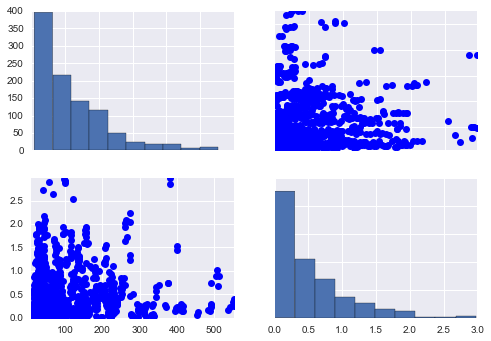

In [10]:
plt.figure()
print('Middle Tolerance')
m.trace(plot=True,tol=5)

Final Distribution


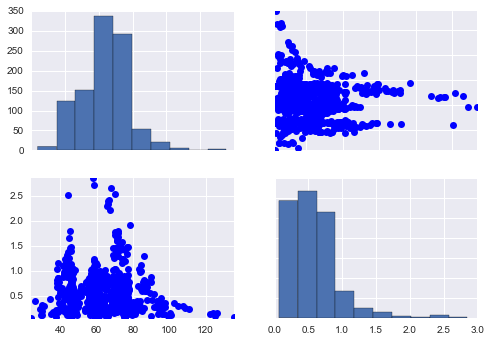

In [11]:
plt.figure()
print('Final Distribution')
m.trace(plot=True,tol=-1)

In [12]:
ps = np.round(m.paramMAP(),decimals=2)
print('MAP for max rate is : {}, MAP for heterogeneity is {}'.format(*ps))

res = m.fitSummary()

MAP for max rate is : 63.31, MAP for heterogeneity is 0.58
param 0 : 60.9001708096 (38.9397282816,93.847984466) 
param 1 : 0.518028122338 (0.128446882178,1.47747159412) 


It slightly underestimates heterogeneity, but is close for max rate

In [13]:
m.save('ecology_model_example')